# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

In [3]:
#import Libraries
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import pandas as pd  
import seaborn as sns 
import statsmodels.formula.api as sm
%matplotlib inline

In [4]:
df=pd.read_csv('C:/Users/Kranti Mohite/Desktop/Python/SampleSuperstore.csv')
print(df)

           Ship Mode      Segment        Country             City  \
0       Second Class     Consumer  United States        Henderson   
1       Second Class     Consumer  United States        Henderson   
2       Second Class    Corporate  United States      Los Angeles   
3     Standard Class     Consumer  United States  Fort Lauderdale   
4     Standard Class     Consumer  United States  Fort Lauderdale   
5     Standard Class     Consumer  United States      Los Angeles   
6     Standard Class     Consumer  United States      Los Angeles   
7     Standard Class     Consumer  United States      Los Angeles   
8     Standard Class     Consumer  United States      Los Angeles   
9     Standard Class     Consumer  United States      Los Angeles   
10    Standard Class     Consumer  United States      Los Angeles   
11    Standard Class     Consumer  United States      Los Angeles   
12    Standard Class     Consumer  United States          Concord   
13    Standard Class     Consumer 

In [5]:
#First 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.duplicated().sum()

17

In [11]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
df['Postal Code']=df['Postal Code'].astype('object')

In [13]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
from matplotlib import style
style.use('dark_background')

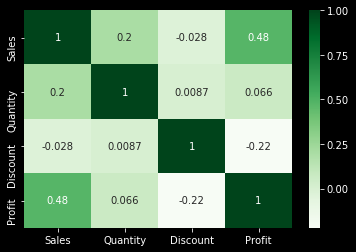

In [17]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='Greens')

In [18]:
df=df.drop(['Postal Code'],axis=1)

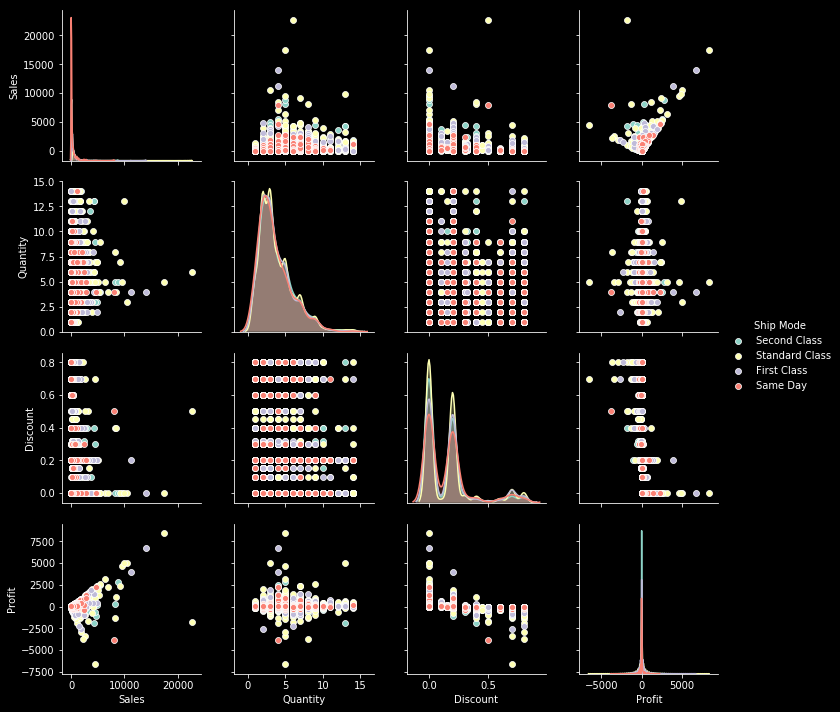

In [19]:
sns.pairplot(df,hue='Ship Mode')

In [21]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

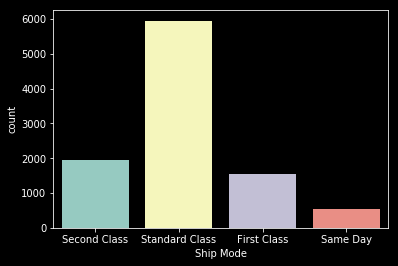

In [23]:
sns.countplot(x=df['Ship Mode'])

In [24]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

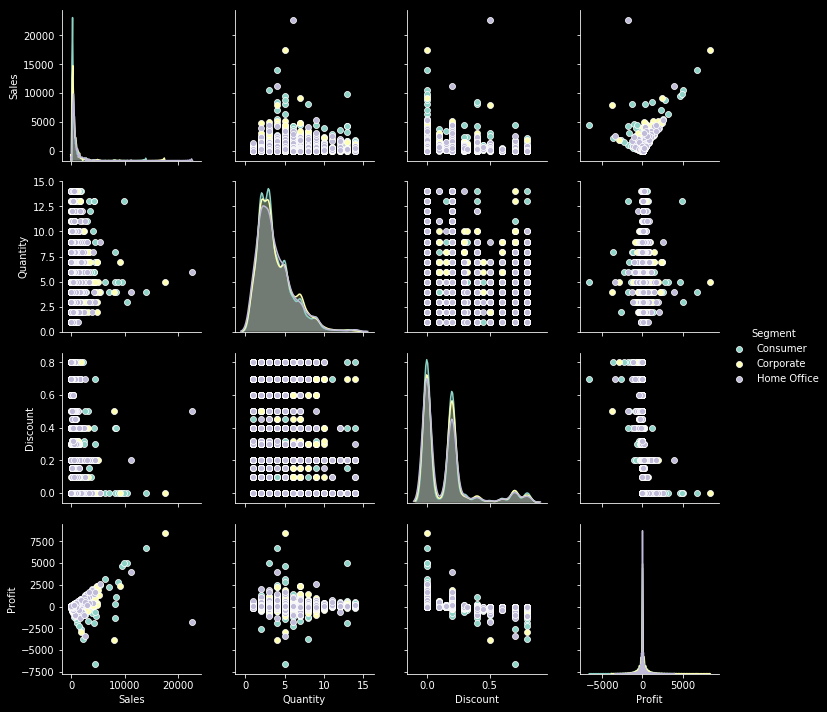

In [25]:
sns.pairplot(df,hue='Segment')

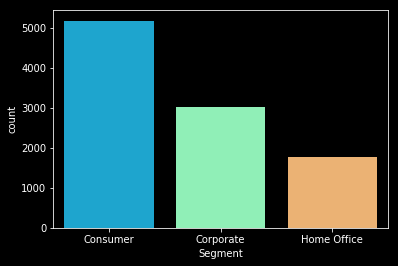

In [26]:
sns.countplot(x='Segment',data=df,palette='rainbow')

In [27]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

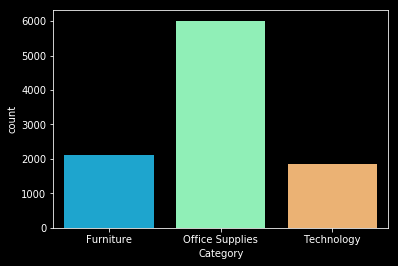

In [26]:
sns.countplot(x='Category',data=df,palette='rainbow')

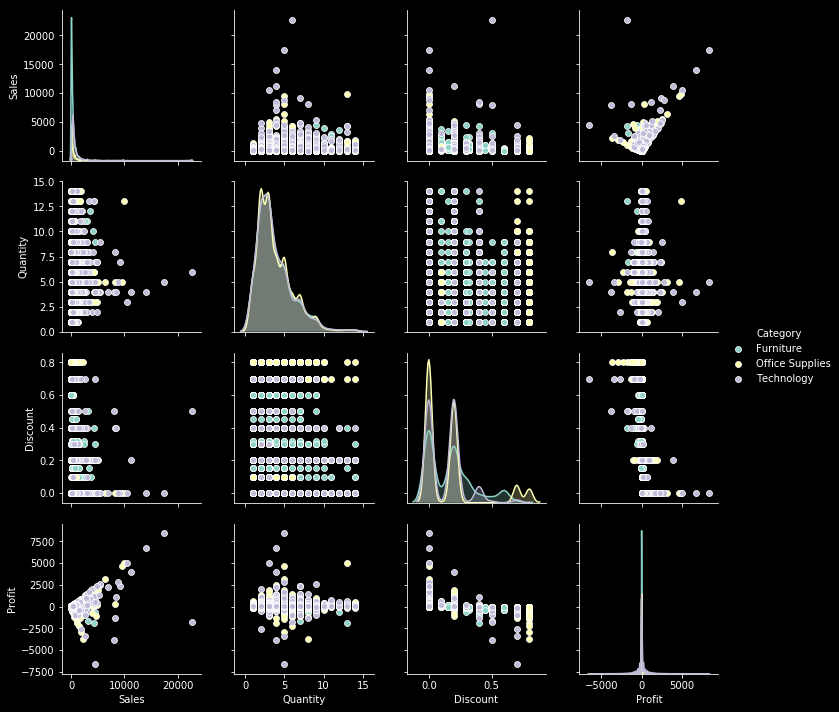

In [27]:
sns.pairplot(df,hue='Category')

In [28]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

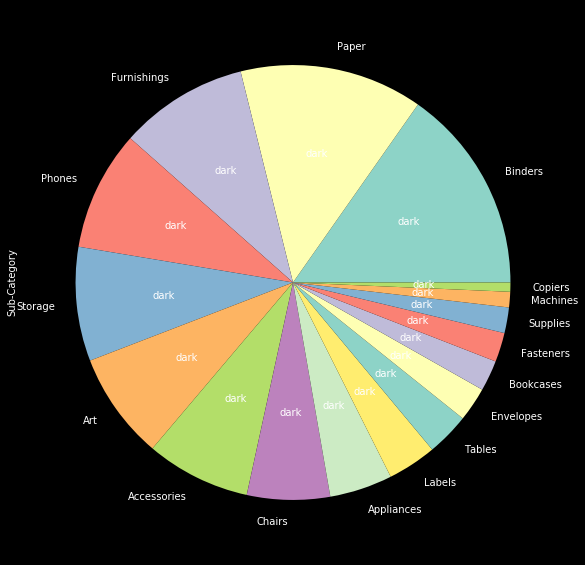

In [29]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct='dark')
plt.show()

In [30]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

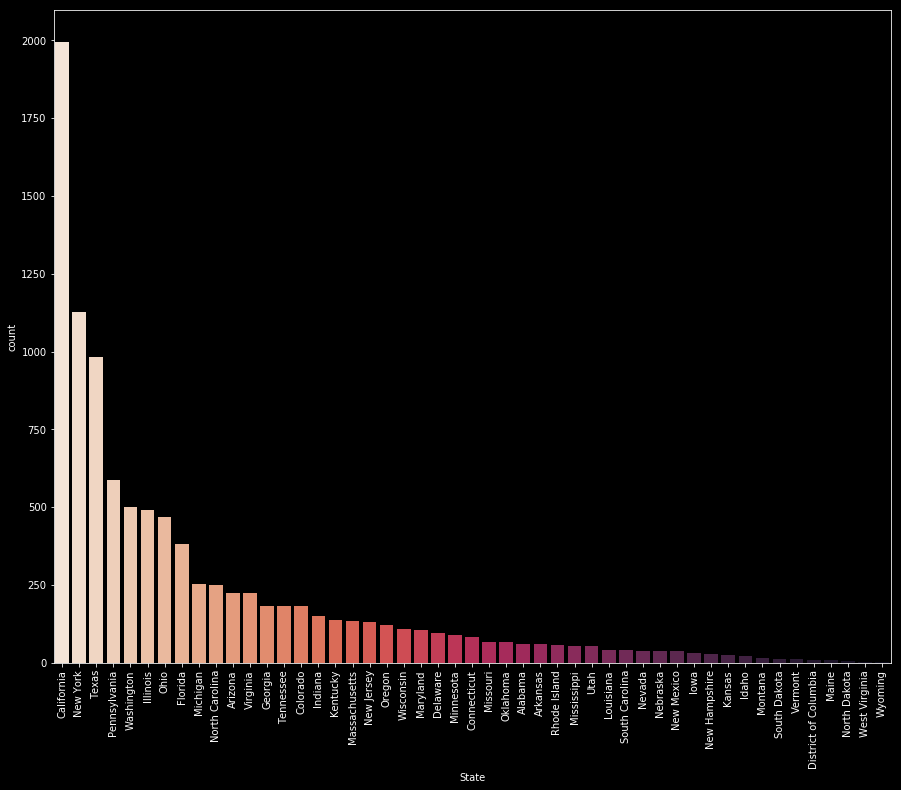

In [31]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

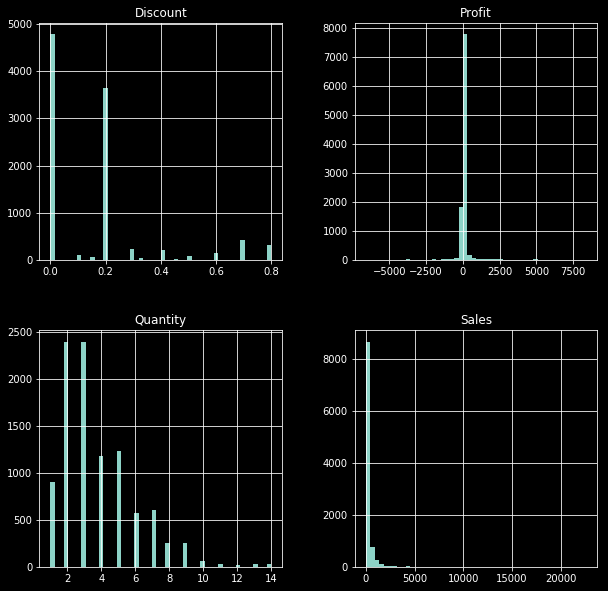

In [32]:
df.hist(figsize=(10,10),bins=50)
plt.show()

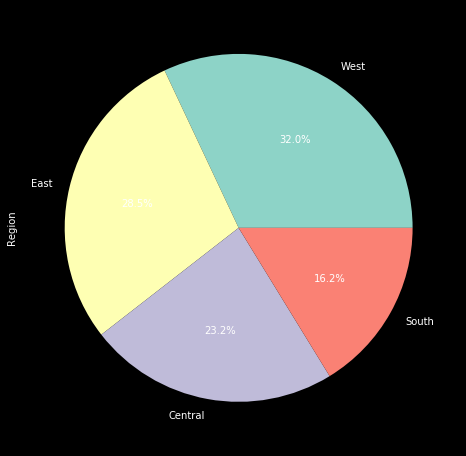

In [33]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Profit Vs Discount

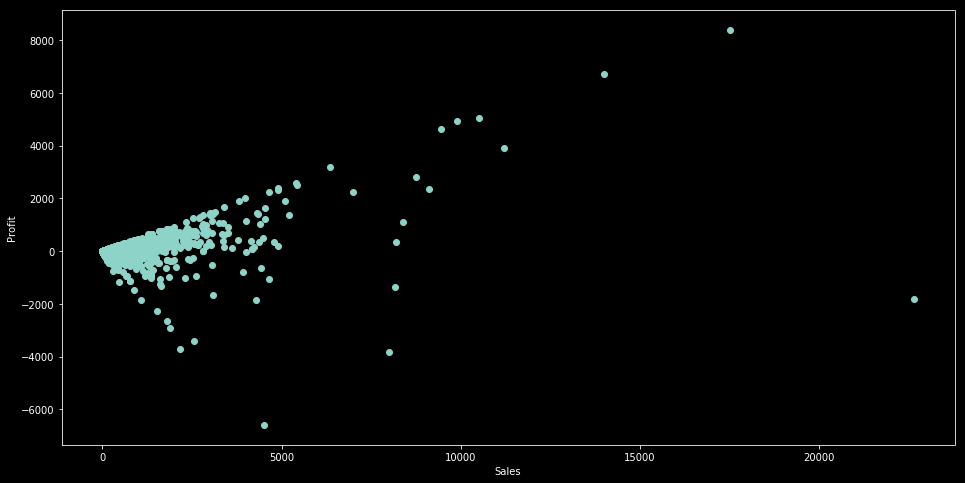

In [32]:

fig,ax=plt.subplots(figsize=(16,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

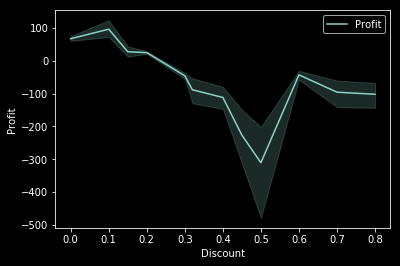

In [33]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

## Profit Vs Quantity

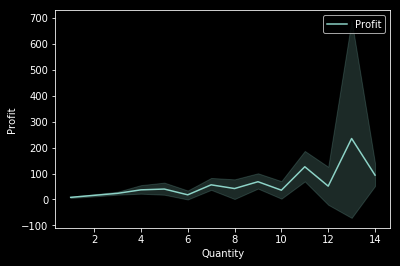

In [39]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

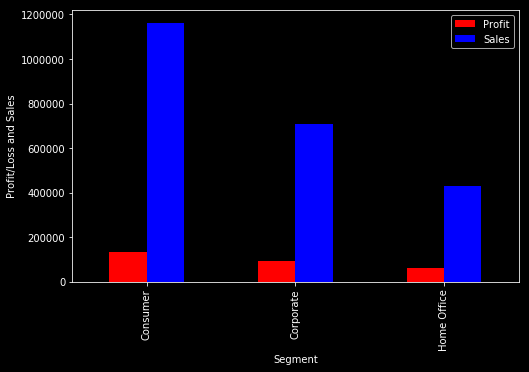

In [41]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['red','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

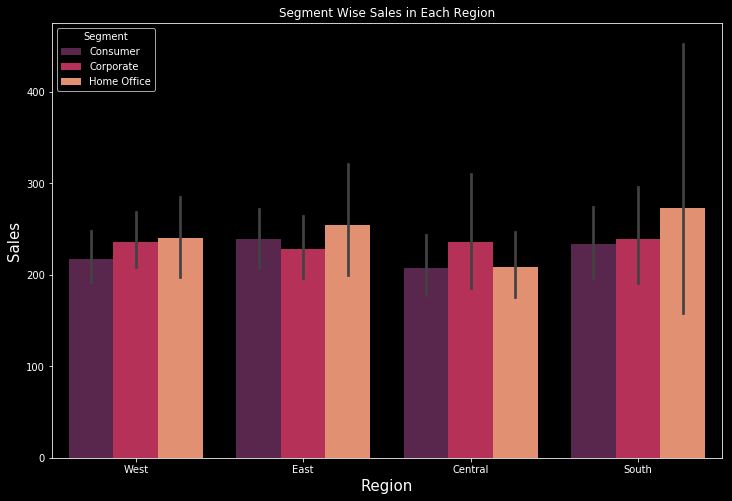

In [44]:
plt.figure(figsize=(12,8))
plt.title('Segment Wise Sales in Each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.show()

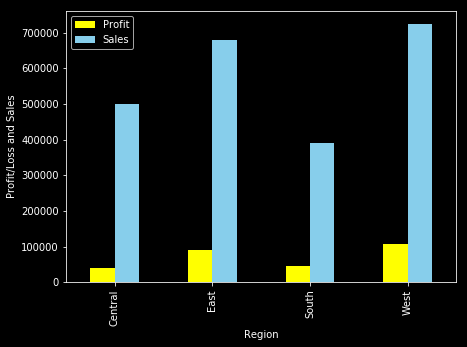

In [49]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['yellow','skyblue'],figsize=(7,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

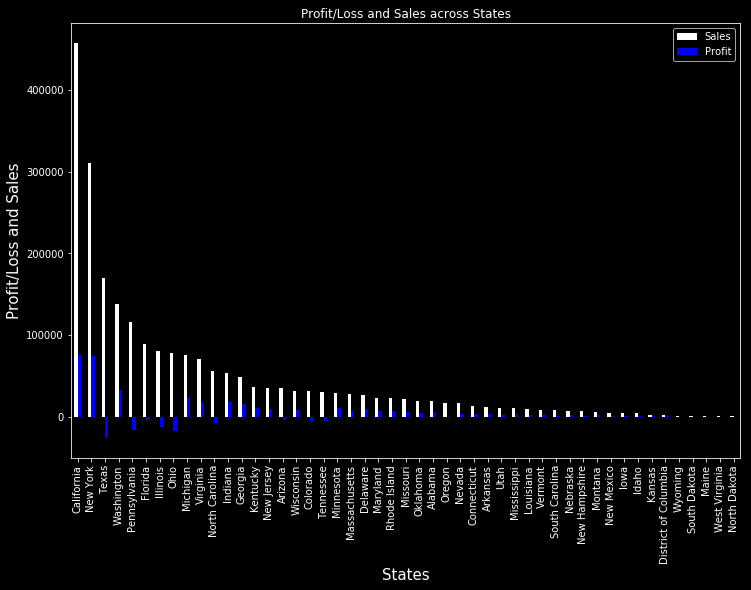

In [52]:
ps=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['white','blue'],figsize=(12,8))
plt.title('Profit/Loss and Sales across States')
plt.xlabel('States',fontsize=15)
plt.ylabel('Profit/Loss and Sales',fontsize=15)
plt.show()

In [53]:
top_states=df['State'].value_counts().nlargest(10)
top_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

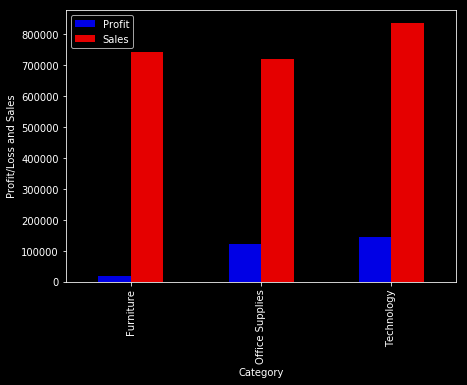

In [54]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],alpha=0.9,figsize=(7,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

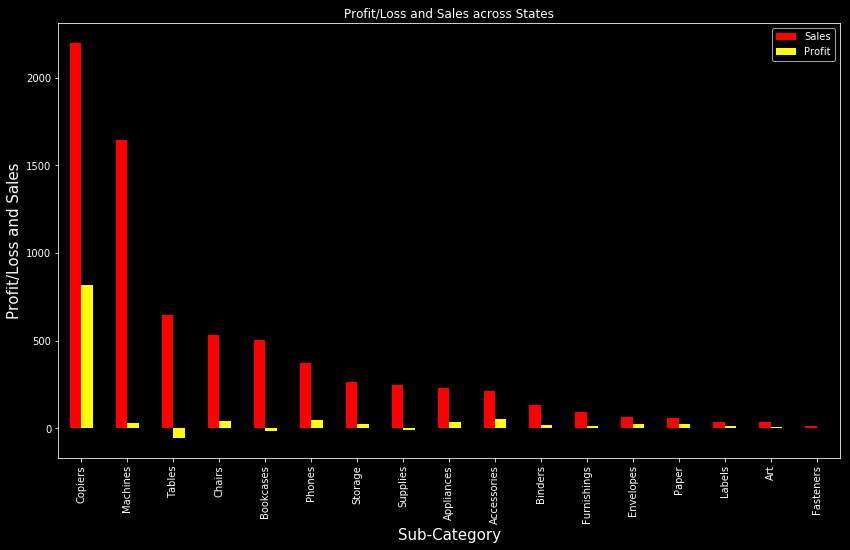

In [34]:
ps=df.groupby('Sub-Category')[['Sales','Profit']].mean().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','yellow'],figsize=(14,8))
plt.title('Profit/Loss and Sales across States')
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Profit/Loss and Sales',fontsize=15)
plt.show()